## Python practise project

Air Quality Descriptive Analysis

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
data = pd.read_csv("F:/Dhrumil/r/tableau dataset/airquality.csv", index_col= 0)   ##To load the csv file.
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5


### Cleaning of the data

In [31]:
data.isnull().sum()   ##Identifying the total null values

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [33]:
data.interpolate(inplace= True)           ##Removing the null values
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.000000,7.4,67,5,1
2,36.0,118.000000,8.0,72,5,2
3,12.0,149.000000,12.6,74,5,3
4,18.0,313.000000,11.5,62,5,4
5,23.0,308.333333,14.3,56,5,5


In [34]:
data.isnull().sum()   ##Reconfirming the null values

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [35]:
data.rename(columns={"Solar.R":"Solar"},inplace=True)      ##Renaming few column
data.head()

,Ozone,Solar,Wind,Temp,Month,Day
1,41.0,190.000000,7.4,67,5,1
2,36.0,118.000000,8.0,72,5,2
3,12.0,149.000000,12.6,74,5,3
4,18.0,313.000000,11.5,62,5,4
5,23.0,308.333333,14.3,56,5,5


In [36]:
data.Solar= data.astype(int).Solar          ##Cleaning the data to understand better
data.Ozone= data.astype(int).Ozone
data.head()

,Ozone,Solar,Wind,Temp,Month,Day
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,23,308,14.3,56,5,5


In [39]:
data.Month.value_counts()

5    31
7    31
8    31
6    30
9    30
Name: Month, dtype: int64

### Now let's plot the data into histogram

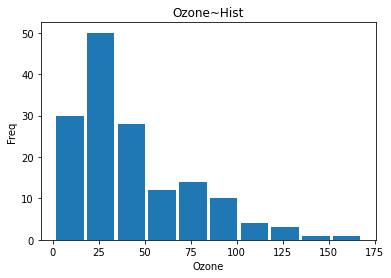

In [8]:
plt.hist(data.Ozone, rwidth= 0.9) 
plt.xlabel("Ozone")
plt.ylabel("Freq")
plt.title("Ozone~Hist");

Here we can observe that, Ozone Histogram is right skewed. Thus, here mean will be higher than median. This is shown below.

In [9]:
data.Ozone.describe()

count    153.000000
mean      43.196078
std       31.845651
min        1.000000
25%       20.000000
50%       33.000000
75%       63.000000
max      168.000000
Name: Ozone, dtype: float64

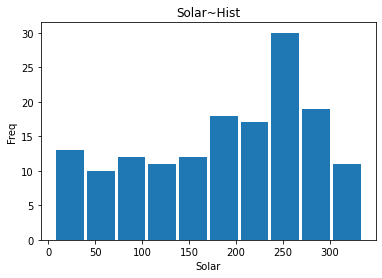

In [10]:
plt.hist(data.Solar, rwidth=0.9)
plt.xlabel("Solar")
plt.ylabel("Freq")
plt.title("Solar~Hist");

Here we can observe that Solar histogram is slight left skewed. As a result of which mean will be lower than median. As shown below.

In [11]:
data.Solar.describe()

count    153.000000
mean     187.045752
std       89.345673
min        7.000000
25%      120.000000
50%      207.000000
75%      259.000000
max      334.000000
Name: Solar, dtype: float64

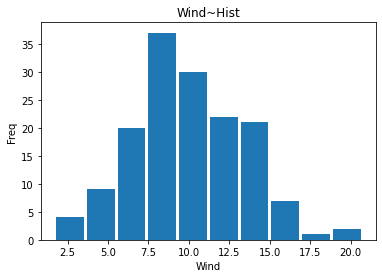

In [12]:
plt.hist(data.Wind, rwidth=0.9)
plt.xlabel("Wind")
plt.ylabel("Freq")
plt.title("Wind~Hist");

The Wind histogram is nearly normaly distributed but very slightly skewed towards right. Thus difference between mean and median is low but mean will be slightly higher than median. This is shown below.

In [13]:
data.Wind.describe()

count    153.000000
mean       9.957516
std        3.523001
min        1.700000
25%        7.400000
50%        9.700000
75%       11.500000
max       20.700000
Name: Wind, dtype: float64

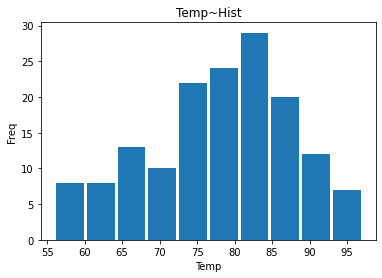

In [14]:
plt.hist(data.Temp, rwidth= 0.9)
plt.xlabel("Temp")
plt.ylabel("Freq")
plt.title("Temp~Hist");

Again Temperature histogram is left skewed. which shows that mean is lower than median. as shown below.

In [15]:
data.Temp.describe()

count    153.000000
mean      77.882353
std        9.465270
min       56.000000
25%       72.000000
50%       79.000000
75%       85.000000
max       97.000000
Name: Temp, dtype: float64

### Now Let's understand the correlation between the parameters

In [16]:
from numpy import corrcoef
import scipy.stats

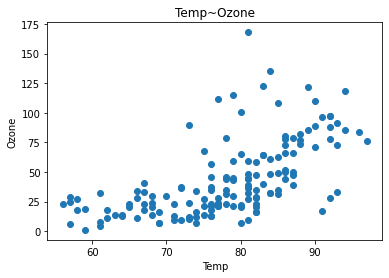

In [18]:
plt.scatter(data.Temp,data.Ozone);
plt.xlabel("Temp")
plt.ylabel("Ozone")
plt.title("Temp~Ozone");

From the above diagram, we can observe that, after a certain point of increase in the value of Temperature (i.e.75), the value of Ozone will be linearly increasing with it. And thus there will be a positive correlation between Ozone and Temperature values. The value of correlation coefficient(r) is shown below which is positive. Also note there are few outliers which we can determine through the box plot.

In [19]:
cor= scipy.stats.pearsonr(data.Temp,data.Ozone)
r= cor[0]
p=cor[1]
print("r=",r)
print("p=",p)

r= 0.6025170778312053
p= 1.7300640439249783e-16


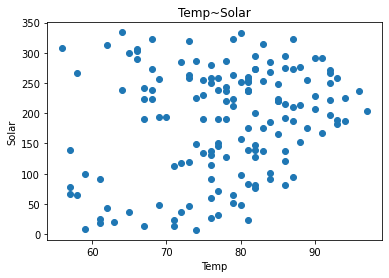

In [20]:
plt.scatter(data.Temp,data.Solar)
plt.xlabel("Temp")
plt.ylabel("Solar")
plt.title("Temp~Solar");

By observing the above graph we can conclude that, temperature and solar is into positive correlation but correlation value between the 2 variables will be very weak as the points are highly scattered.

In [21]:
cor= scipy.stats.pearsonr(data.Temp,data.Solar)
r= cor[0]
p=cor[1]
print("r=",r)
print("p=",p)

r= 0.22984300702676247
p= 0.004262505924867688


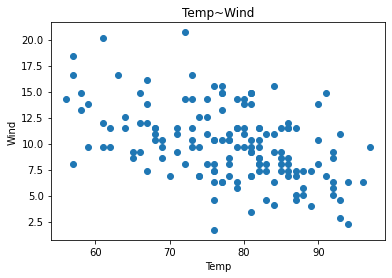

In [22]:
plt.scatter(data.Temp,data.Wind);
plt.xlabel("Temp")
plt.ylabel("Wind")
plt.title("Temp~Wind");

As observed from the above graph, both the variables are into negation correlation with each other. thus as the temperature increases the wind level decreases. Thus, the value of r between them will be negative as below.

In [23]:
cor= scipy.stats.pearsonr(data.Temp,data.Wind)
r= cor[0]
p=cor[1]
print("r=",r)
print("p=",p)

r= -0.45798787910483296
p= 2.6415972043405178e-09


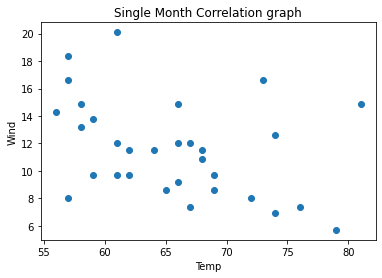

In [51]:
new_data = data[data.Month == 5]                              ##Filtered by month to analyse monthly effect
plt.scatter(new_data.Temp,new_data.Wind);
plt.xlabel("Temp")
plt.ylabel("Wind")
plt.title("Single Month Correlation graph");